<a href="https://colab.research.google.com/github/divyalaldinani/Deep-Learning-in-PyTorch/blob/main/PyTorch_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
torch.__version__

'2.5.1+cu124'

In [3]:
scalar = torch.tensor(7)

In [4]:
scalar

tensor(7)

In [5]:
scalar.ndim

0

In [6]:
# retreive the number from the tensor
scalar.item()

7

In [7]:
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [8]:
vector.ndim

1

In [9]:
vector.shape

torch.Size([2])

In [10]:
matrix = torch.tensor([[7, 8],
                       [9, 10]])
matrix

tensor([[ 7,  8],
        [ 9, 10]])

In [11]:
matrix.ndim

2

In [12]:
matrix.shape

torch.Size([2, 2])

In [13]:
matrix = torch.tensor([[1]])

In [14]:
matrix.item()

1

In [15]:
tensor = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [4, 8, 12]]])
tensor.shape

torch.Size([1, 3, 3])

In [16]:
tensor.ndim

3

https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-scalar-vector-matrix-tensor.png

## Random Tensors

In [17]:
tensor = torch.rand(size = (3, 4))
tensor, tensor.dtype

(tensor([[0.4780, 0.8429, 0.8330, 0.2208],
         [0.4484, 0.2780, 0.9931, 0.7269],
         [0.2463, 0.6927, 0.2683, 0.5697]]),
 torch.float32)

In [18]:
tensor.ndim, tensor.shape

(2, torch.Size([3, 4]))

### Random Tensors of zeros and ones

In [19]:
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [20]:
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

## Range tensors

In [21]:
# numbers starting with specific numbers and having diff as specified and diff = step size between them
range_tensor = torch.arange(start = 0, end=10, step=0.5)
range_tensor

tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000, 5.5000, 6.0000, 6.5000, 7.0000, 7.5000, 8.0000, 8.5000,
        9.0000, 9.5000])

In [22]:
range_tensor = torch.arange(start = 0, end= 10, step=1)
range_tensor

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
# random integers in a range
random_range_tensor = torch.randint(1, 10, (5,), dtype = torch.float32)
random_range_tensor

tensor([2., 8., 5., 8., 8.])

In [24]:
# random float numbers in a range -> torch.rand() returns UNIFORM distribution
random_range_tensor = torch.rand(5)*(100-65)+65 # range - [65, 100)
random_range_tensor

tensor([89.9659, 66.7210, 88.8395, 66.2874, 72.7093])

In [25]:
# random float numbers in a range -> torch.randn() returns NORMAL/GUASSIAN distribution
tensor = torch.randn(5) * 2 + 5 # mean = 5, std dev = 2
tensor

tensor([3.9660, 2.3469, 3.5036, 6.6934, 6.1635])

### Data types in tensors

#### Default dtype in torch tensor is float32, the datatype, size and device of the tensors must be approapriate if you want to perform any operation between them

In [26]:
float_16_tensor = torch.tensor([3., 6., 9.], dtype = torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

### Tensor Operations


* Addition
* Subtraction
* Multiplication (element-wise) / dot product
* Division
* Matrix Multiplication

In [27]:
tensor = torch.tensor([1, 2, 3])
tensor + 10 # performed on the copy of tensor, original tensor unchanged

tensor([11, 12, 13])

In [28]:
tensor * 10 # performed on the copy of tensor, original tensor unchanged

tensor([10, 20, 30])

In [29]:
tensor

tensor([1, 2, 3])

In [30]:
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [31]:
tensor # original tensor -> unchanged

tensor([1, 2, 3])

In [32]:
tensor * tensor # element wise multiplication

tensor([1, 4, 9])

#### Matrix Multiplication
using `torch.matmul()` method.
Main rules for inner dimensions must match:
* Scalar () x () -> ()
* (m,) x (m,) -> Not allowed
* (m,) x (m, n) -> (n,)
* (m, n) x (n,) -> (m,)
* (m, k) x (k, n) -> (m, n)
* (b, m, k) x (k,) -> (b, m)
* (b, m, k) x (k, n) -> (b, m, n)
* (b, m, k) x (b, k, n) -> (b, m, n)
* (b1, b2, m, k) x (k,) -> (b1, b2, m)
* (b1, b2, m , k) x (k, n) -> (b1, b2, m, n)
* (b, m, k) x (b, k, n, p) -> (b, m, n, p)
* (b1, b2, m, k) x (b1, b2, k, n) -> (b1, b2, m, n)

In case of 4d tensor x 4d tensor:-
* We can think of (b1, b2) as b1 × b2 independent batch groups.
* Each batch (m, k) from A gets multiplied with the corresponding batch (k, n) from B.
* This results in a (m, n) matrix for each batch.
* Since there are b1 × b2 total batches, the output shape is (b1, b2, m, n).

Similarly, you can think of how 4d tensor x 3d tensor or 3d tensor x 3d tesnor works.

In [33]:
tensor.matmul(tensor)

tensor(14)

In [34]:
tensor @ tensor

tensor(14)

In [35]:
A = torch.randn(3, 2)
B = torch.randn(3, 2)

In [36]:
# A @ B

In [37]:
A @ B.T

tensor([[ 0.2897, -0.5791,  0.9477],
        [-0.0900, -0.1300, -0.6544],
        [-0.8454,  2.2712, -2.0894]])

### torch.nn.Linear()

Understanding torch.nn.Linear(in_features=2, out_features=6)
This defines a fully connected (linear) layer in PyTorch that transforms an input tensor of size 2 into an output tensor of size 6 using a learnable weight matrix and a bias.<br>

What Happens Internally?<br>
* Weight Matrix (W): A learnable matrix of shape (6, 2) (since output features = 6, input features = 2).
* Bias Vector (b): A learnable vector of shape (6,) (one bias per output feature).
* Forward Pass Computation:
Given an input x of shape (batch_size, 2), the layer computes:
𝑦=𝑥𝑊^T+𝑏<br>
where:<br>
x is of shape (batch_size, 2)<br>
W^T (transpose of W) is of shape (2, 6)<br>
b is of shape (6,), broadcasted across the batch<br>
y is of shape (batch_size, 6)


In [38]:
torch.manual_seed(42)
linear = torch.nn.Linear(in_features=2, out_features=6)

In [39]:
x = A
output = linear(A) # foward pass through linear layer

In [40]:
output

tensor([[ 0.0237, -0.3164,  0.2721, -0.3198,  0.7845, -0.0980],
        [ 0.9101,  0.7551,  0.5215,  0.3936, -0.1295,  0.0434],
        [ 1.5405,  0.3011,  0.2431, -0.2560,  0.9734,  0.9284]],
       grad_fn=<AddmmBackward0>)

### finding min, max, mean, sum etc (AGGREGATION)

In [41]:
x = torch.randn(100, 20)
x

tensor([[-0.4974,  0.4396, -0.7581,  ...,  1.7174,  0.3189, -0.4245],
        [ 0.3057, -0.7746,  0.0349,  ..., -0.7360, -0.8371, -0.9224],
        [-0.0635,  0.6756, -0.0978,  ...,  0.4263,  0.5750, -0.6417],
        ...,
        [ 0.1637,  1.3456, -1.1182,  ..., -0.1790, -0.1972, -0.6042],
        [-1.7987, -0.6078, -0.5876,  ...,  0.9967,  1.0238, -1.2133],
        [ 0.9745,  0.4532,  1.1673,  ...,  0.2250, -0.5818,  0.8647]])

In [42]:
x.min()

tensor(-3.1063)

In [43]:
x.max()

tensor(3.4456)

In [44]:
x.type(torch.float32).mean()

tensor(0.0253)

In [45]:
x.sum()

tensor(50.5648)

using `torch` methods

In [46]:
torch.max(x), torch.min(x), torch.mean(x), torch.sum(x)

(tensor(3.4456), tensor(-3.1063), tensor(0.0253), tensor(50.5648))

### Positional min/max

In [47]:
tensor = torch.arange(10, 100, 10)
tensor

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [48]:
tensor.argmax(), tensor.argmin()

(tensor(8), tensor(0))

### Change tensor datatype

In [49]:
tensor = torch.randn(3, 10)
tensor.dtype

torch.float32

In [50]:
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([[ 0.6934, -0.4358, -0.9824, -0.9062,  1.2598,  0.3462,  0.2145, -0.2671,
          0.4604,  1.1787],
        [-1.0107, -0.6201, -1.4551, -0.5898, -0.6001, -0.0580,  0.2976,  1.6328,
         -1.4951, -0.2998],
        [-0.4146, -0.7832, -1.5078, -1.3662,  0.9639,  0.0405,  0.2469,  0.1125,
         -0.5352,  0.9170]], dtype=torch.float16)

In [51]:
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([[ 0,  0,  0,  0,  1,  0,  0,  0,  0,  1],
        [-1,  0, -1,  0,  0,  0,  0,  1, -1,  0],
        [ 0,  0, -1, -1,  0,  0,  0,  0,  0,  0]], dtype=torch.int8)

In [52]:
tensor

tensor([[ 0.6935, -0.4359, -0.9825, -0.9063,  1.2596,  0.3463,  0.2145, -0.2671,
          0.4603,  1.1791],
        [-1.0106, -0.6203, -1.4549, -0.5898, -0.6002, -0.0580,  0.2975,  1.6328,
         -1.4954, -0.2997],
        [-0.4145, -0.7833, -1.5083, -1.3664,  0.9640,  0.0405,  0.2469,  0.1125,
         -0.5349,  0.9171]])

In [53]:
tensor.dtype

torch.float32

### Reshaping, stacking, squeezing and unsqueezing

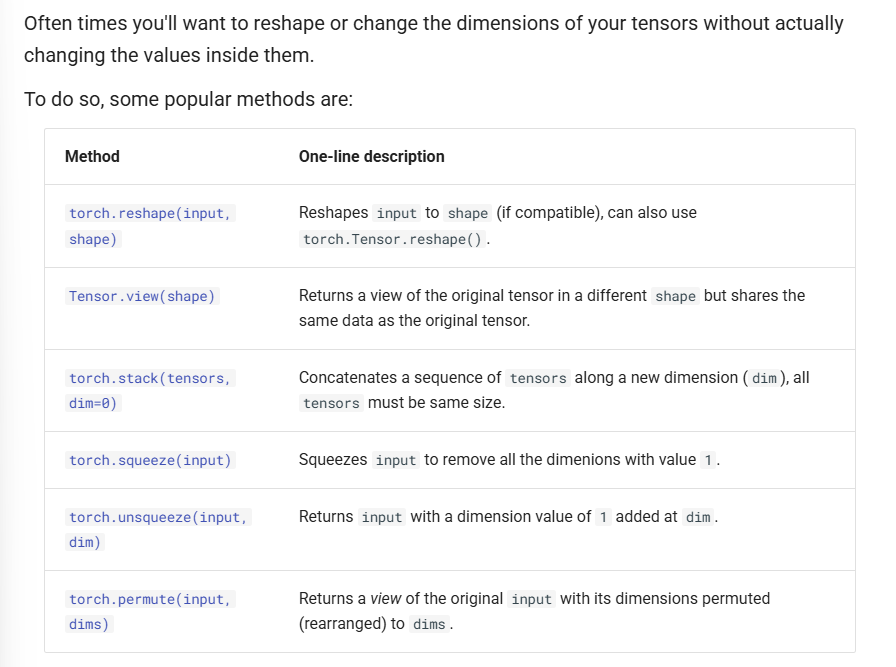

In [54]:
x = torch.randn(1, 10)
x

tensor([[ 2.1046,  0.8042, -3.1167, -2.2687,  0.8120,  0.3449,  0.9291, -1.2824,
          0.7300, -0.7016]])

In [55]:
x.shape

torch.Size([1, 10])

In [56]:
x_reshaped = x.reshape(2, 5)
x_reshaped

tensor([[ 2.1046,  0.8042, -3.1167, -2.2687,  0.8120],
        [ 0.3449,  0.9291, -1.2824,  0.7300, -0.7016]])

creating a view of the original tensor

In [57]:
z = x.view(1, 10)
z, z.shape

(tensor([[ 2.1046,  0.8042, -3.1167, -2.2687,  0.8120,  0.3449,  0.9291, -1.2824,
           0.7300, -0.7016]]),
 torch.Size([1, 10]))

🔑NOTE: Remember though, changing the view of a tensor with torch.view() really only creates a new view of the same tensor.
So changing the view changes the original tensor too.


In [58]:
z[:, 0] = 5
z, x

(tensor([[ 5.0000,  0.8042, -3.1167, -2.2687,  0.8120,  0.3449,  0.9291, -1.2824,
           0.7300, -0.7016]]),
 tensor([[ 5.0000,  0.8042, -3.1167, -2.2687,  0.8120,  0.3449,  0.9291, -1.2824,
           0.7300, -0.7016]]))

stacking up the tensor multiple times using `torch.stack()`

In [59]:
x_stacked = torch.stack([x, x, x, x], dim=0)
x_stacked

tensor([[[ 5.0000,  0.8042, -3.1167, -2.2687,  0.8120,  0.3449,  0.9291,
          -1.2824,  0.7300, -0.7016]],

        [[ 5.0000,  0.8042, -3.1167, -2.2687,  0.8120,  0.3449,  0.9291,
          -1.2824,  0.7300, -0.7016]],

        [[ 5.0000,  0.8042, -3.1167, -2.2687,  0.8120,  0.3449,  0.9291,
          -1.2824,  0.7300, -0.7016]],

        [[ 5.0000,  0.8042, -3.1167, -2.2687,  0.8120,  0.3449,  0.9291,
          -1.2824,  0.7300, -0.7016]]])

removing all the single dims from the tensor, i.e, if a dim has a single inner element, then we remove it<br>
suppose we have a tensor of shape (4, 3, 1, 2) then we make it (4, 3, 2)

In [60]:
x = torch.randn(4, 3, 1, 2)
x.squeeze(), x.squeeze().shape

(tensor([[[-0.8791,  1.5491],
          [ 0.0154, -0.0276],
          [-0.0537, -0.7734]],
 
         [[-1.3838,  0.9782],
          [ 0.6528,  0.4743],
          [-1.1011, -0.5321]],
 
         [[-0.5346, -1.4052],
          [ 1.8912,  1.3595],
          [-0.9208, -0.9451]],
 
         [[-1.3551, -1.0257],
          [-0.8582, -0.4748],
          [-0.9581, -0.3348]]]),
 torch.Size([4, 3, 2]))

In [61]:
x.shape

torch.Size([4, 3, 1, 2])

In [62]:
x_squeezed = x.squeeze()
x_squeezed

tensor([[[-0.8791,  1.5491],
         [ 0.0154, -0.0276],
         [-0.0537, -0.7734]],

        [[-1.3838,  0.9782],
         [ 0.6528,  0.4743],
         [-1.1011, -0.5321]],

        [[-0.5346, -1.4052],
         [ 1.8912,  1.3595],
         [-0.9208, -0.9451]],

        [[-1.3551, -1.0257],
         [-0.8582, -0.4748],
         [-0.9581, -0.3348]]])

🔑`unsqueeze()` requires dim so that it can add a dimension value of 1 at particular position in the tensor

In [63]:
x_unsqueezed = x.unsqueeze(dim=3)
x.shape

torch.Size([4, 3, 1, 2])

rearange axes values with torch.permute(input, dims) where input gets turned into a view with new dims

In [64]:
x = torch.rand(224, 512, 3)
x_permuted = x.permute(2, 0, 1) # dim = (3, 224, 224)

In [65]:
x_permuted.shape

torch.Size([3, 224, 512])

### Indexing( selecting specific data from tensors)

In [66]:
x = torch.randn(3, 8).reshape(4, 3, 2)
x, x.shape

(tensor([[[-1.4204, -1.3899],
          [ 1.4084, -0.7380],
          [ 1.2645, -0.0307]],
 
         [[-1.7492,  0.2599],
          [ 2.1796, -0.2982],
          [-1.4531,  0.0088]],
 
         [[-0.3315, -1.2489],
          [-0.2512,  0.6765],
          [ 0.9320, -1.3856]],
 
         [[ 0.9507, -1.3206],
          [ 1.1417, -0.5916],
          [ 0.1290,  0.5944]]]),
 torch.Size([4, 3, 2]))

In [67]:
x[0], x[0][0], x[0][0][0]

(tensor([[-1.4204, -1.3899],
         [ 1.4084, -0.7380],
         [ 1.2645, -0.0307]]),
 tensor([-1.4204, -1.3899]),
 tensor(-1.4204))

In [68]:
x[:, 0]

tensor([[-1.4204, -1.3899],
        [-1.7492,  0.2599],
        [-0.3315, -1.2489],
        [ 0.9507, -1.3206]])

x is (4, 3, 2)<br>
`x[:, 0]` selects all vectors in outer dim and 1st row in each batch and all elements in it as the 3rd dim is not specified

In [69]:
x[:, 1, 1] # all batches and 1st value in 1st row in each batch

tensor([-0.7380, -0.2982,  0.6765, -0.5916])

In [70]:
x[0, 0, :] # first batch and 1st row and all values in it

tensor([-1.4204, -1.3899])

### PyTorch Tensors and NumPy

In [71]:
# converting numpy array to tensor

import numpy as np
array = np.arange(1, 8)
tensor = torch.from_numpy(array)
array, tensor

(array([1, 2, 3, 4, 5, 6, 7]), tensor([1, 2, 3, 4, 5, 6, 7]))

In [72]:
# converting tensor to numpy array

tensor = torch.ones(12)
array = tensor.numpy()
tensor, array

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32))

### Reproducibilty

In [73]:
A = torch.rand(3, 4)
B = torch.rand(3, 4)

A == B

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [74]:
torch.manual_seed(42)

A = torch.rand(3, 4)
# without below line, B tensor would be different from A tensor
torch.random.manual_seed(42)
B = torch.rand(3, 4)

A == B

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### Running tensors on GPUs

In [75]:
!nvidia-smi

Fri Feb 21 09:55:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [76]:
torch.cuda.is_available()

True

In [77]:
device = 'cuda'
device

'cuda'

In [78]:
torch.cuda.device_count()

1

In [79]:
torch.backends.mps.is_available()

False

In [81]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'cpu'

### Moving tensors to GPU

In [82]:
tensor = torch.tensor([1, 3, 6])
tensor, tensor.device

(tensor([1, 3, 6]), device(type='cpu'))

In [84]:
if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available

In [87]:
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 3, 6], device='cuda:0')

### Moving back tensors to CPU

In [88]:
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

This copies the tensor to CPU memory so it's usable with CPUs.
<br>
The above returns a copy of the GPU tensor in CPU memory so the original tensor is still on GPU.

In [91]:
tensor_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_on_cpu

array([1, 3, 6])

In [92]:
tensor_on_gpu

tensor([1, 3, 6], device='cuda:0')

reference taken from: https://www.learnpytorch.io/00_pytorch_fundamentals/